# **Intro to Deep Learning**
TensorFlow, Keras

## **1. A Single Neuron**
Linear units, the building blocks of deep learning

* fully-connected neural network architecture
* apply neural nets to regression, classification
* train neural nets with stochastic gradient descent
* improve performance with dropout batch normalization, and other techniques

### Deep Learning
approach to machine learning characterized by deep stacks of computations

계산 깊이 덕분에 딥러닝 모델은 실제 데이터 셋에서 발견되는 복잡하고 계층적인 패턴의 종류를 분리할 수 있다.

신경망은 뉴런으로 구성되며, 각 뉴런은 개별적으로 간단한 계산만 수행한다. 신경망의 힘은 이러한 뉴런이 형성할 수 있는 연결의 복잡성에서 비롯됩니다.

### The Linear Unit
fundamental component of a neural network : the individual neuron

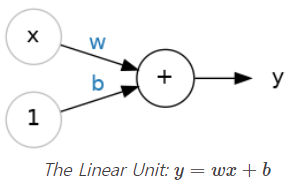

* x : input
* w : weight
  * neural network learns by modifying its weights
* b : bias
* y : outputs

### Example - The Linear Unit as a Model
Single neuron models are **linear models**

80 Cereals
1. training a model with **sugars**
2. output : **calories**
3. bias : 90
4. weight : 2.5
$$calories=2.5\times5+90=102.5$$

### Multiple Inputs

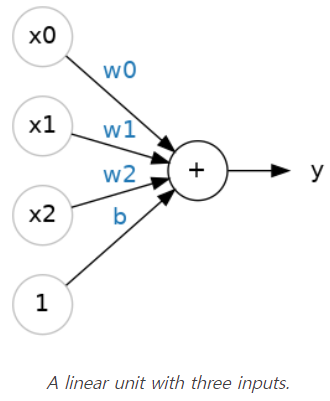

$$y=w_0x_0+w_1x_1+w_2x_2+b$$
A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.

### Linear Units in Keras
`keras.Sequential`

creates a neural network as a stack of **layers**

We can create models like those above using a dense layer.
* input : sugars, fiber, protein
* output : calories

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model=keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* `units` : define how many outputs we want.
  * `units=1` : we are just predicting **calories**.
* `input_shape` : dimensions of the inputs.
  * `input_shape=[3]` : model will accept three features as input ('sugars', 'fiber', 'protein')

## **2. Deep Neural Networks**
Add hidden layers to your network to uncover complex relationships.

**modularity** : building up a complex network from simpler functional units. how to combine and modify these single units to model more complex relationships.

### Layers
Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of inputs we get a dense layer.

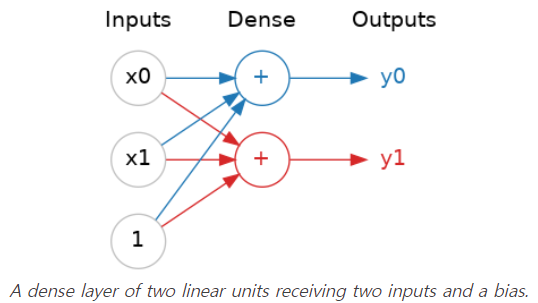

신경망의 각 레이어는 비교적 간단한 변환을 수행하는 것으로 생각할 수 있습니다(**layer=transformation**). 심층적인 레이어 스택을 통해 신경망은 점점 더 복잡한 방식으로 입력을 변환할 수 있습니다. 잘 훈련된 신경망에서 각 레이어는 솔루션에 조금 더 가까워지는 변환입니다.

### The Activation Function
single dense layer들만 가지고서는 선과 면에서 벗어날 수 없다. nonlinear한 게 필요하다. -> 활성 함수 필요

**1. rectifier function** : $max(0, x)$


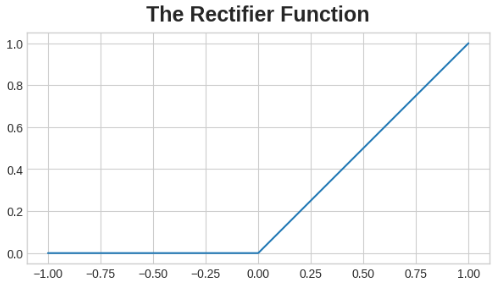

* 음수 부분이 0으로 "보정"된 직선 형태이다. 이 함수를 뉴런의 출력에 적용하면 데이터가 구부러져 단순한 선에서 멀어집니다.

**2. rectified linear unit(ReLU)** : attach the rectifier to a linear unit. $max(0, w\times{x}+b)$

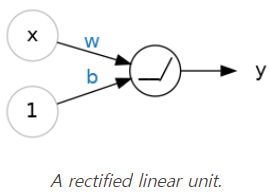

### Stacking Dense Layers

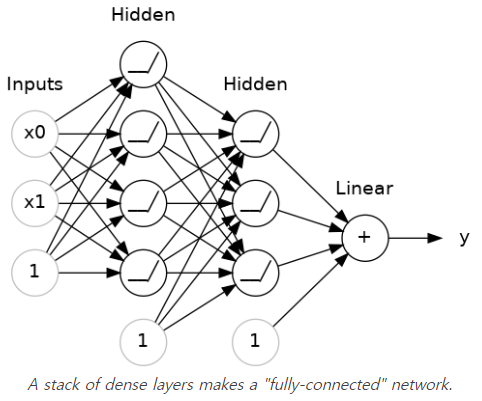

* hidden layer : layers before the output layer
* output layer : linear unit(no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value.Other task like classification might require an activation function on the output.

### Building Sequential Models
Sequential model : connect together a list of layers in order from first to last. The first layer gets the input, the last layer produces the output.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),

    # the linear output layer
    layers.Dense(units=1),
])

pass all the layers together in a list like `[layer, layer, layer, ...]` instead of as separate arguments.
* `activation` : add an activation function to a layer

# **3. Stochastic Gradient Descent**
Use Keras as Tensorflow to train your first neural network.

we learned how to build fully-connectd networks out of stacks of dense layers. When first created, all of the network's weights are set randomly.

In addition to the training data, we need two more things:
* loss function : how good the network's predictions are
* optimizer : tell the network how to change its weights

### Loss Function
네트워크에 어떤 문제를 해결해야 하는지 알려주는 방법이 손실 함수의 역할입니다. 손실 함수는 대상의 실제 값과 모델이 예측하는 값 사이의 차이를 측정합니다.

A common loss function for regression problems is the **mean absolute error(MAE)**. For each prediction y_pred, MAE measures the disparity(차이) from the true target `y_true` by an absolute difference `abs(y_true - y_pred)`.

**mean-squared error(MSE)**, **the Huber loss**.

학습 중에 모델은 손실 함수를 가중치의 정확한 값을 찾기 위한 가이드로 사용합니다(손실이 적을수록 좋습니다). 즉, 손실 함수는 네트워크에 목표를 알려줍니다.

### The Optimizer - Stochastic Gradient Descent
how to solve it. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called **stochastic gradient descent**. They are iterative algorithms that train a network in steps. One step of training goes like this:
1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

In [4]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
from IPython.display import display

red_wine=pd.read_csv('/content/drive/MyDrive/24-2/EURON/과제/Week3/DL DATA/red-wine.csv')

# Create training and validation splits
df_train=red_wine.sample(frac=0.7, random_state=0)
df_valid=red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_=df_train.max(axis=0)
min_=df_train.min(axis=0)
df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)

# Split features and target
X_train=df_train.drop('quality', axis=1)
X_valid=df_valid.drop('quality', axis=1)
y_train=df_train['quality']
y_valid=df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [8]:
print(X_train.shape)

(1119, 11)


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [11]:
history=model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.3138 - val_loss: 0.1354
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1384 - val_loss: 0.1233
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1316 - val_loss: 0.1202
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1210 - val_loss: 0.1105
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1110 - val_loss: 0.1094
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1067 - val_loss: 0.1029
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1070 - val_loss: 0.1070
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1067 - val_loss: 0.1001
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1028 - val_loss: 0.1031
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0991 - val_loss: 0.1042


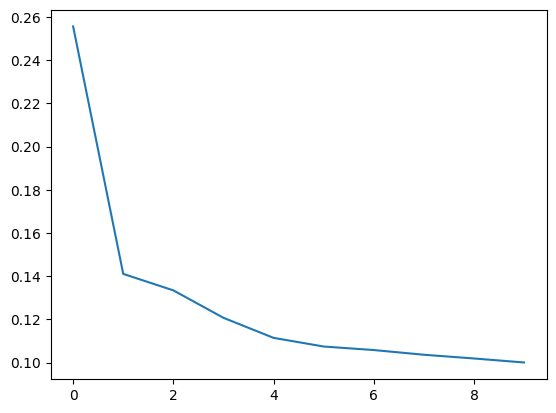

In [12]:
import pandas as pd

# convert the training history to a dataframe
history_df=pd.DataFrame(history.history)

# use pandas native plot method
history_df['loss'].plot();

In [13]:
model=keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider=keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper=keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(
    min_delta=0.001, ## minimum amout of change to count as an improvement
    patience=20, ## how many epochs to wait before stopping
    restore_best_weights=True,
)

In [21]:
import pandas as pd
from IPython.display import display

red_wine=pd.read_csv('/content/drive/MyDrive/24-2/EURON/과제/Week3/DL DATA/red-wine.csv')

# Create training and validation splits
df_train=red_wine.sample(frac=0.7, random_state=0)
df_valid=red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_=df_train.max(axis=0)
min_=df_train.min(axis=0)
df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)

# Split features and target
X_train=df_train.drop('quality', axis=1)
X_valid=df_valid.drop('quality', axis=1)
y_train=df_train['quality']
y_valid=df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [22]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping=callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

model=keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae',
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss : 0.09103038161993027


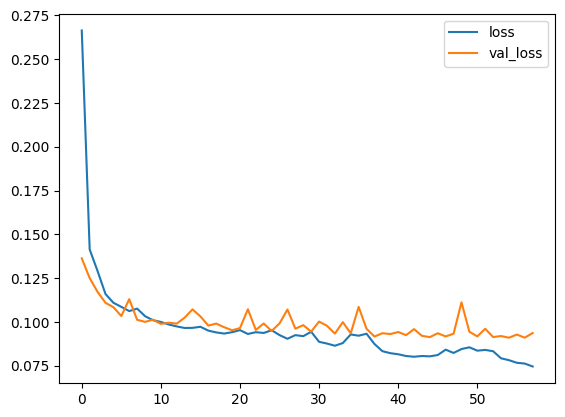

In [23]:
history=model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0,
)

history_df=pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print('Minimum validation loss : {}'.format(history_df['val_loss'].min()))

In [24]:
keras.Sequential([
    layers.Dropout(rate=0.3),
    layers.Dense(16),
])

<Sequential name=sequential_10, built=False>

In [25]:
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),

(<BatchNormalization name=batch_normalization, built=False>,)

In [26]:
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

(<Activation name=activation, built=False>,)

In [27]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

import pandas as pd
from IPython.display import display

red_wine=pd.read_csv('/content/drive/MyDrive/24-2/EURON/과제/Week3/DL DATA/red-wine.csv')

# Create training and validation splits
df_train=red_wine.sample(frac=0.7, random_state=0)
df_valid=red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_=df_train.max(axis=0)
min_=df_train.min(axis=0)
df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)

# Split features and target
X_train=df_train.drop('quality', axis=1)
X_valid=df_valid.drop('quality', axis=1)
y_train=df_train['quality']
y_valid=df_valid['quality']

<ipython-input-27-bce42ef07ac1>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


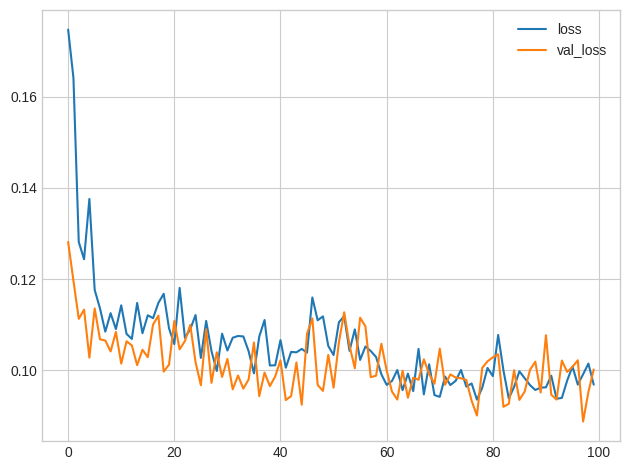

In [30]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history=model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

history_df=pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [31]:
import pandas as pd
from IPython.display import display

ion=pd.read_csv('/content/drive/MyDrive/24-2/EURON/과제/Week3/DL DATA/ion.csv', index_col=0)
display(ion.head())

df=ion.copy()
df['Class']=df['Class'].map({'good' : 0, 'bad' : 1})

df_train=df.sample(frac=0.7, random_state=0)
df_valid=df.drop(df_train.index)

max_=df_train.max(axis=0)
min_=df_train.min(axis=0)

df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)
df_train.dropna(axis=1, inplace=True)

df_valid.dropna(axis=1, inplace=True)

X_train=df_train.drop('Class', axis=1)
X_valid=df_valid.drop('Class', axis=1)
y_train=df_train['Class']
y_valid=df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [33]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [35]:
early_stopping=keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history=model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
)

Best Validation Loss : 0.2685
Best Validation Accuracy : 0.9333


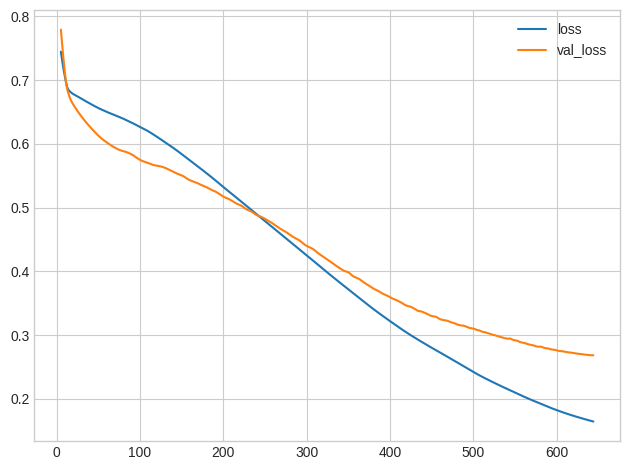

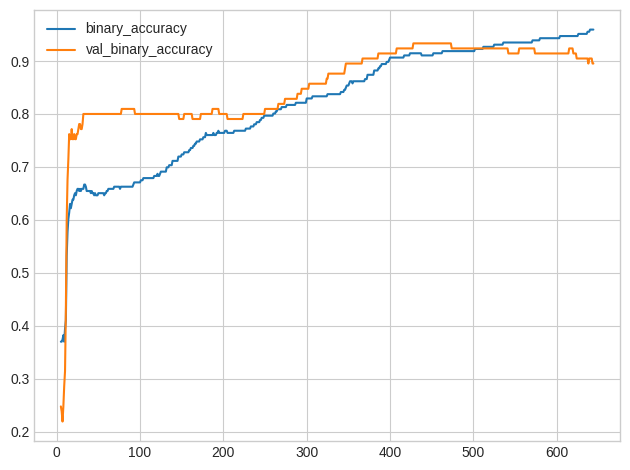

In [36]:
history_df=pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(('Best Validation Loss : {:0.4f}'+
       '\nBest Validation Accuracy : {:0.4f}').format(history_df['val_loss'].min(),
                                                      history_df['val_binary_accuracy'].max()))